In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal

In [2]:
plt.style.use("ggplot")

### **Estimation Theory**

In [3]:
# Ejercicio 4

In [4]:
Xw1 = np.array([
    [0.42, -0.087, 0.58], [-0.2, -3.3, -3.4], [1.3, -0.32, 1.7], [0.39, 0.71, 0.23], [-1.6, -5.3, -0.15], 
    [-0.029, 0.89, -4.7], [-0.23, 1.9, 2.2], [0.27, -0.3, -0.87], [-1.9, 0.76, -2.1], [0.87, -1.0, -2.6]
])

Xw2 = np.array([
    [-0.4, 0.58, 0.089], [-0.31, 0.27, -0.04], [0.38, 0.055, -0.035], [-0.15, 0.53, 0.011], [-0.35, 0.47, 0.034],
    [0.17, 0.69, 0.1], [-0.011, 0.55, -0.18], [-0.27, 0.61, 0.12], [-0.065, 0.49, 0.0012], [-0.12, 0.054, -0.063]
])

Xw3 = np.array([
    [0.83, 1.6, -0.014], [1.1, 1.6, 0.48], [-0.44, -0.41, 0.32], [0.047, -0.45, 1.4], [0.28, 0.35, 3.1],
    [-0.39, -0.48, 0.11], [0.34, -0.079, 0.14], [-0.3, -0.22, 2.2], [1.1, 1.2, -0.46], [0.18, -0.11, -0.49]
])

In [5]:
mu1_hat = np.mean(Xw1, axis=0)
print("mu1_hat =", mu1_hat)

mu2_hat = np.mean(Xw2, axis=0)
print("mu2_hat =", mu2_hat)

mu3_hat = np.mean(Xw3, axis=0)
print("mu3_hat =", mu3_hat)

mu1_hat = [-0.0709 -0.6047 -0.911 ]
mu2_hat = [-0.1126   0.4299   0.00372]
mu3_hat = [0.2747 0.3001 0.6786]


In [6]:
S1_hat = np.cov(Xw1, rowvar=False, ddof=0)
print("S1_hat =")
print(S1_hat)

S2_hat = np.cov(Xw2, rowvar=False, ddof=0)
print("S2_hat =")
print(S2_hat)

S3_hat = np.cov(Xw3, rowvar=False, ddof=0)
print("S3_hat =")
print(S3_hat)

S1_hat =
[[0.90617729 0.56778177 0.3940801 ]
 [0.56778177 4.20071481 0.7337023 ]
 [0.3940801  0.7337023  4.541949  ]]
S2_hat =
[[ 0.05392584 -0.01465126 -0.00517993]
 [-0.01465126  0.04597009  0.00850987]
 [-0.00517993  0.00850987  0.00726551]]
S3_hat =
[[ 0.30186081  0.40474153 -0.18042342]
 [ 0.40474153  0.64496409 -0.20130386]
 [-0.18042342 -0.20130386  1.26214164]]


In [7]:
# Ejercicio 5

In [8]:
np.random.seed(42)

n = 900

n1 = int(n / 3)
n2 = int(n / 3)
n3 = n - n1 - n2

Xw1_s = multivariate_normal.rvs(mu1_hat, S1_hat, n1)
Xw2_s = multivariate_normal.rvs(mu2_hat, S2_hat, n2)
Xw3_s = multivariate_normal.rvs(mu3_hat, S3_hat, n3)

y_w1 = 1 * np.ones(n1)
y_w2 = 2 * np.ones(n2)
y_w3 = 3 * np.ones(n3)

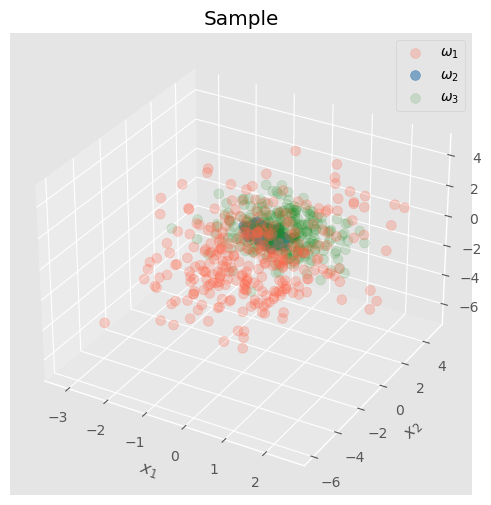

In [9]:
fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(111, projection="3d")

ax.scatter(Xw1_s[:, 0], Xw1_s[:, 1], Xw1_s[:, 2], s=50, color="tomato", alpha=0.25, label=r"$\omega_1$")
ax.scatter(Xw2_s[:, 0], Xw2_s[:, 1], Xw2_s[:, 2], s=50, color="steelblue", alpha=0.65, label=r"$\omega_2$")
ax.scatter(Xw3_s[:, 0], Xw3_s[:, 1], Xw3_s[:, 2], s=50, color="forestgreen", alpha=0.15, label=r"$\omega_3$")

ax.set_title("Sample")
ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$x_2$")
ax.set_zlabel(r"$x_3$")

ax.legend()

plt.show()

In [10]:
X = np.vstack((Xw1_s, Xw2_s, Xw3_s))
y = np.hstack((y_w1, y_w2, y_w3))

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, stratify=y)

In [12]:
P_w1_train = sum(y_train == 1) / len(y_train)
P_w2_train = sum(y_train == 2) / len(y_train)
P_w3_train = sum(y_train == 3) / len(y_train)

Xw1_train = X_train[y_train == 1]
Xw2_train = X_train[y_train == 2]
Xw3_train = X_train[y_train == 3]

mu1_train = np.mean(Xw1_train, axis=0)
mu2_train = np.mean(Xw2_train, axis=0)
mu3_train = np.mean(Xw3_train, axis=0)

S1_train = np.cov(Xw1_train, rowvar=False, ddof=0)
S2_train = np.cov(Xw2_train, rowvar=False, ddof=0)
S3_train = np.cov(Xw3_train, rowvar=False, ddof=0)

In [13]:
def g1(x):

    S1_train_inv = np.linalg.inv(S1_train)
    S1_train_det = np.linalg.det(S1_train)

    W1 = - S1_train_inv / 2
    w1 = S1_train_inv @ mu1_train
    b1 = - (mu1_train.T @ S1_train_inv @ mu1_train + np.log(S1_train_det)) / 2 + np.log(P_w1_train)

    return x.T @ W1 @ x + w1.T @ x + b1

def g2(x):

    S2_train_inv = np.linalg.inv(S2_train)
    S2_train_det = np.linalg.det(S2_train)

    W2 = - S2_train_inv / 2
    w2 = S2_train_inv @ mu2_train
    b2 = - (mu2_train.T @ S2_train_inv @ mu2_train + np.log(S2_train_det)) / 2 + np.log(P_w2_train)

    return x.T @ W2 @ x + w2.T @ x + b2

def g3(x):

    S3_train_inv = np.linalg.inv(S3_train)
    S3_train_det = np.linalg.det(S3_train)

    W3 = - S3_train_inv / 2
    w3 = S3_train_inv @ mu3_train
    b3 = - (mu3_train.T @ S3_train_inv @ mu3_train + np.log(S3_train_det)) / 2 + np.log(P_w3_train)

    return x.T @ W3 @ x + w3.T @ x + b3

def classifier(x):
    return np.argmax([g1(x), g2(x), g3(x)]) + 1

In [14]:
# Train Error

n_train = X_train.shape[0]

y_pred = np.zeros_like(y_train)
for i in range(n_train):
    y_pred[i] = classifier(X_train[i])

train_error = sum(y_pred != y_train) / n_train
print(f"Train Error: {train_error:.2f}")

Train Error: 0.07


In [15]:
# Test Error

n_test = X_test.shape[0]

y_pred = np.zeros_like(y_test)
for i in range(n_test):
    y_pred[i] = classifier(X_test[i])

test_error = sum(y_pred != y_test) / n_test
print(f"Test Error: {test_error:.2f}")

Test Error: 0.09
